In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
#Read csv into DataFrame df
df = pd.read_csv('data_science.csv')

In [4]:
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [ ]:
#Remove unnecessary columns
df.drop(['Unnamed: 0', 'salary'], axis= 1, inplace= True)

In [ ]:
#Visualize the change of mean salary over the years
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)

In [7]:
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [ ]:
#Turn df1 to a table
data = {
        'work_year' : df1.index,
        'average_salary' : df1.values

}

df1 = pd.DataFrame(data)

In [11]:
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [12]:
df1['average_salary'] = (df1['average_salary']/1000).round(2)

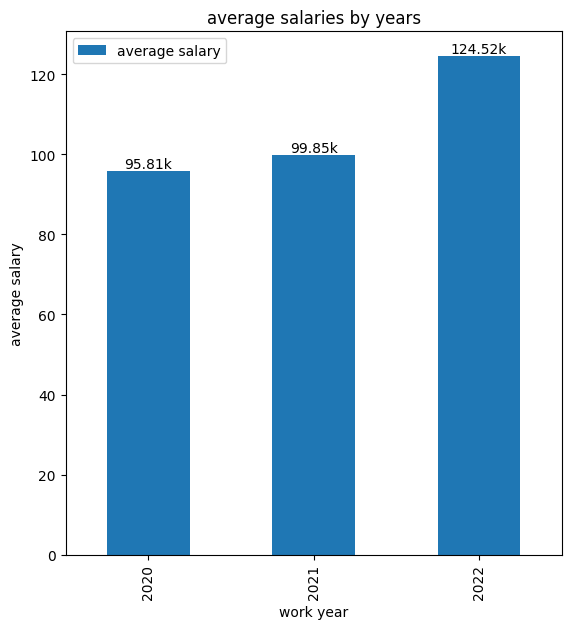

In [ ]:
#Plot graph of salaries over the years
ax = df1.plot(kind= 'bar', x = 'work_year', y = 'average_salary', legend= True )
ax.bar_label(ax.containers[0], labels= df1['average_salary'].map('{:.2f}k'.format))
plt.subplots_adjust(top = 1.2)
ax.legend(['average salary'], loc = 'upper left')
plt.xlabel('work year')
plt.ylabel('average salary')
plt.title('average salaries by years')
plt.show()

In [ ]:
values = df1.to_list()

In [16]:
labels = ['fully remote', 'no remote', 'partially remote']

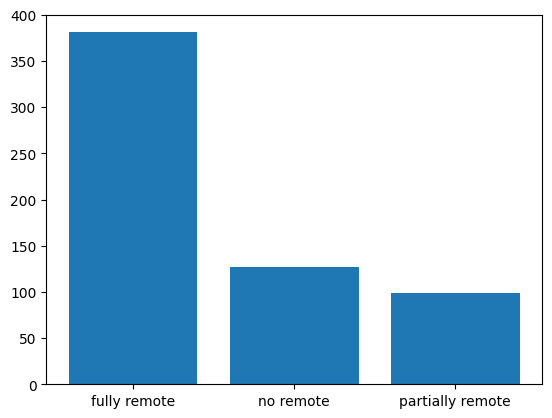

In [ ]:
#Graph of popularity of jobs
z = plt.bar(labels, values)

In [19]:
df3 = df.company_size.value_counts()

In [21]:
df3.to_list()

[326, 198, 83]

In [22]:
df3.index.to_list()

['M', 'L', 'S']

In [23]:
df3.values

array([326, 198,  83], dtype=int64)

In [24]:
values2 = df3.values

In [25]:
labels_for_company = ['medium', 'large', 'small']

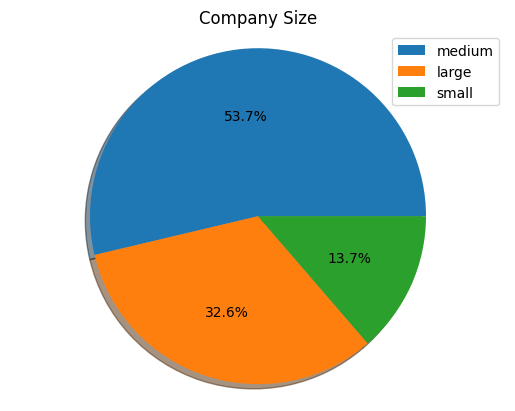

In [ ]:
#Pie chart visualizing company size
plt.pie(x= values2, labels = None, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.legend(labels= labels_for_company, loc = 'upper right')
plt.title('Company Size')
plt.show()

In [ ]:
#Top 5 job titles
df4 = df.job_title.value_counts()[:5]

C:\Users\sultan\AppData\Local\Temp\ipykernel_6472\3223498196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df4.index, y= df4.values, palette = 'viridis')


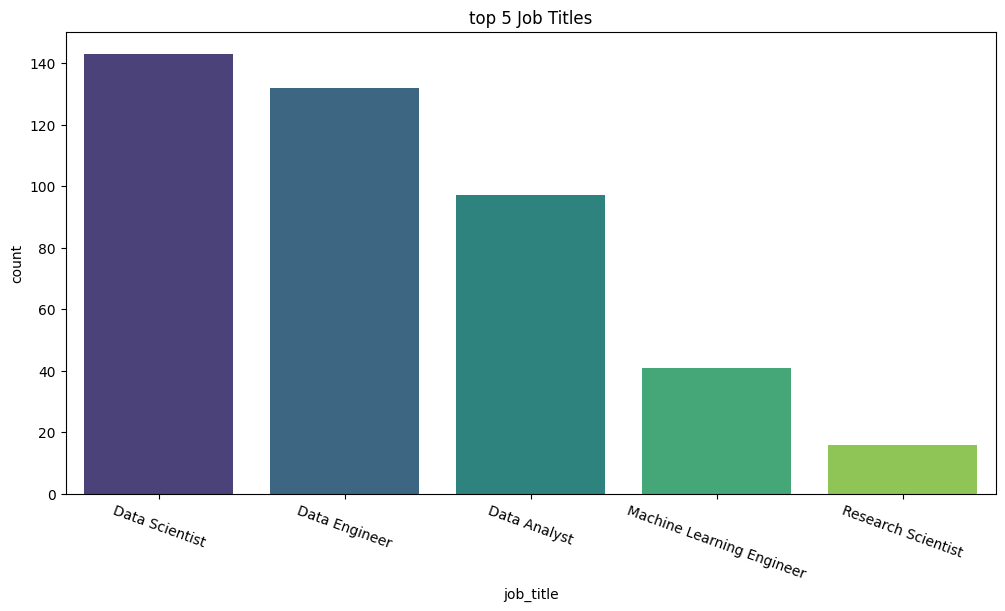

In [ ]:
#Bar graph for job popularity 
plt.figure(figsize = (12,6))
#plt.bar(x= df4.index, height=df4.values)
sns.barplot(x= df4.index, y= df4.values, palette = 'viridis')
plt.title('top 5 Job Titles')
plt.ylabel('count')
plt.xticks(rotation = -20)
plt.show()

In [31]:
df5 = df[['salary_in_usd', 'company_size']]

In [32]:
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L= df5[df5['company_size'] == 'L']

In [ ]:
#Map salary to company size
sal_mean = [S['salary_in_usd'].mean(), M['salary_in_usd'].mean(), L['salary_in_usd'].mean()]

In [34]:
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [ ]:
#Make the sal_mean readable by adding K
label_change = np.round([x/1000 for x in sal_mean], 2)
label_change = list(map(str, label_change))
label_change = [x + ' k' for x in label_change]
label_change

['77.63 k', '116.91 k', '119.24 k']

In [39]:
labels2 = ['Medium', 'Large', 'Small']

Text(0, 0.5, 'Salary in usd')

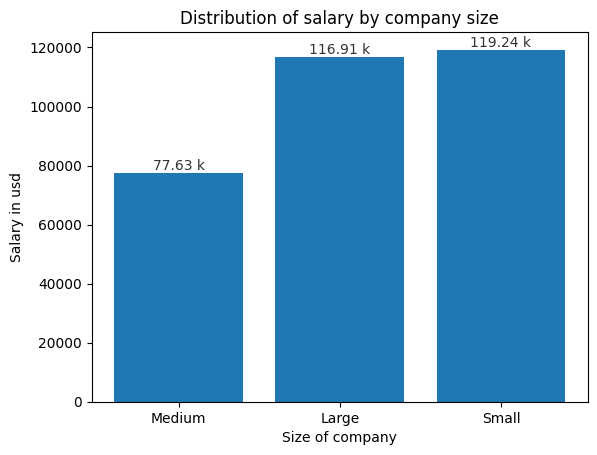

In [ ]:
#map salary by company size
j = plt.bar(labels2, sal_mean)
plt.bar_label(j, label_change, alpha = 0.8)
plt.title('Distribution of salary by company size')
plt.xlabel('Size of company')
plt.ylabel('Salary in usd')

Text(0.5, 0, 'Salary in usd')

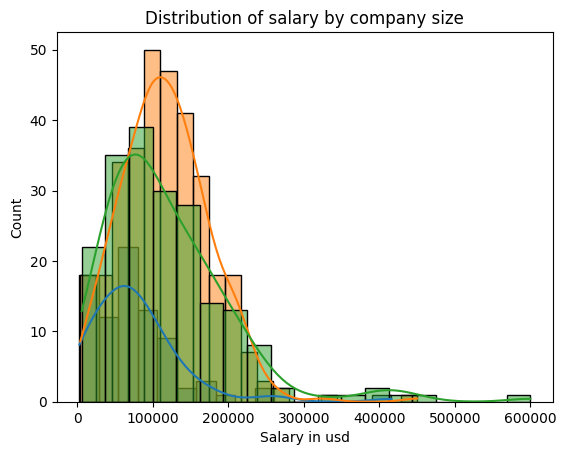

In [41]:
sns.histplot(S['salary_in_usd'], label = 'small', kde= True)
sns.histplot(M['salary_in_usd'], label = 'medium', kde= True)
sns.histplot(L['salary_in_usd'], label = 'large', kde= True)

plt.title('Distribution of salary by company size')
plt.xlabel('Salary in usd')


In [42]:
df6 = df.experience_level.value_counts()

In [43]:
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [44]:
exp_map = {
    'SE' : 'senior',
    'MI' : 'middle',
    'EX' : 'expert',
    'EN' : 'entry'

}

In [45]:
df['experience_level'].replace(exp_map, inplace = True)

C:\Users\sultan\AppData\Local\Temp\ipykernel_6472\412009391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience_level'].replace(exp_map, inplace = True)


In [46]:
labeo = df6.index.to_list()

In [47]:
value = df6.values

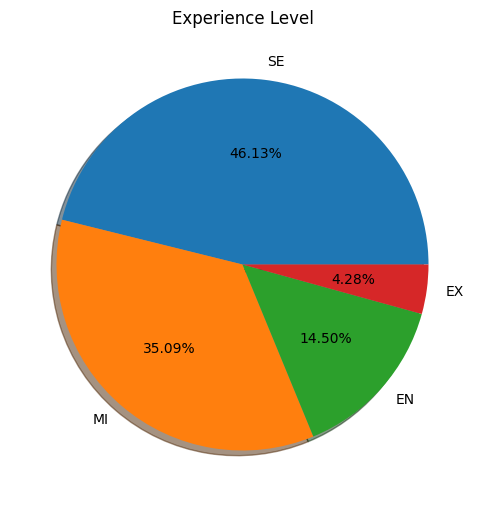

In [48]:
plt.figure(figsize= (6,12))
plt.pie(x = value, labels = labeo, autopct= '%1.2f%%', shadow = True)
plt.title('Experience Level')
plt.show()